<a href="https://www.kaggle.com/code/tiwariadityaa/dataset-transformation?scriptVersionId=167807879" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def image_segmentation(original_img, _threshold=250):
    
    J=cv2.bilateralFilter(original_img,9,75,75)
    a=np.array(J)
    m,n,p=a.shape
    for r in range(1,m-1):
        for c in range(1,n-1):
            s=J[r,c]
            n1=J[r+1,c]
            n2=J[r-1,c]
            n3=J[r,c+1]
            n4=J[r,c-1]
            n5=J[r-1,c-1]
            n6=J[r+1,c+1]
            n7=J[r+1,c-1]
            n8=J[r-1,c+1]

            s1=s-n1
            s2=s-n2
            s3=s-n3
            s4=s-n4
            s5=s-n5
            s6=s-n6
            s7=s-n7
            s8=s-n8
            threshold=_threshold
            if (all(s1<threshold) and all(s2<threshold) and all(s3<threshold) and all(s4<threshold) and all(s5<threshold) and all(s6<threshold) and all(s7<threshold) and all(s8<threshold)):
                J[r,c]=0;
            else:
                J[r,c]=s;
    
    ret, final_img = cv2.threshold(J, 110, 255, cv2.THRESH_BINARY_INV)
    return final_img;

In [3]:
def print_image(img_path, img_name):
    
    img_original = cv2.imread(img_path)
    img_original = cv2.resize(img_original, (200, 200), interpolation=cv2.INTER_CUBIC);
    img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(18,4))
    plt.subplot(1, 6, 1)
    plt.gca().set_title('Original')
    plt.imshow(img_original)
    plt.axis('off')

    for pos, thrs in enumerate([50, 100, 150, 200],start = 2):
        img_seg = image_segmentation(img_original, thrs)
        plt.subplot(1, 6, pos)
        plt.gca().set_title('Threshold - '+str(thrs))
        plt.imshow(img_seg)
        plt.axis('off')

    plt.subplot(1, 6, 6)
    plt.gca().set_title('Negative')
    plt.imshow(255 - np.array(img_original))
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(img_name)
    plt.show()

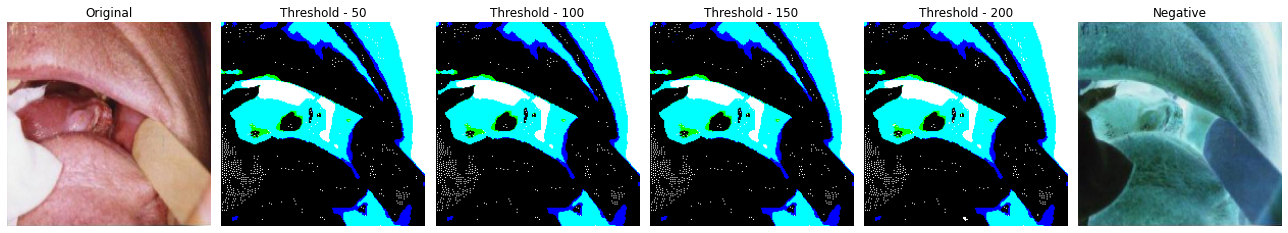

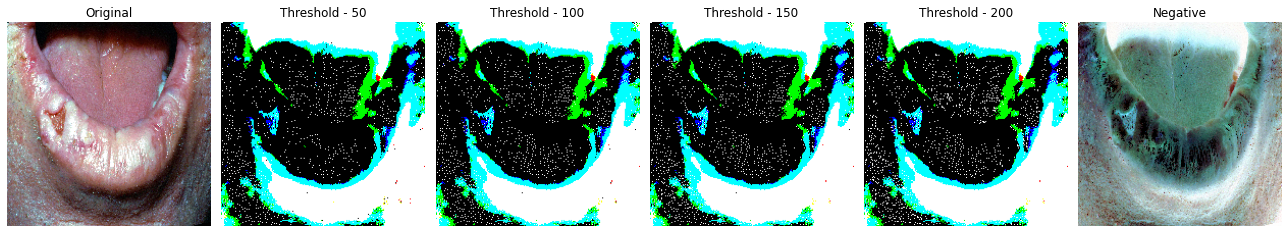

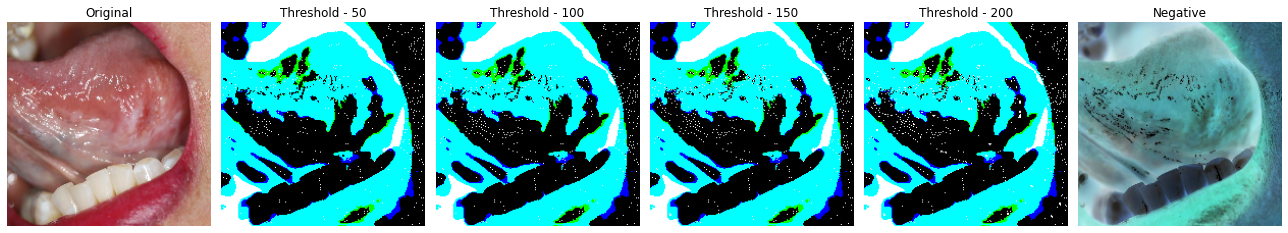

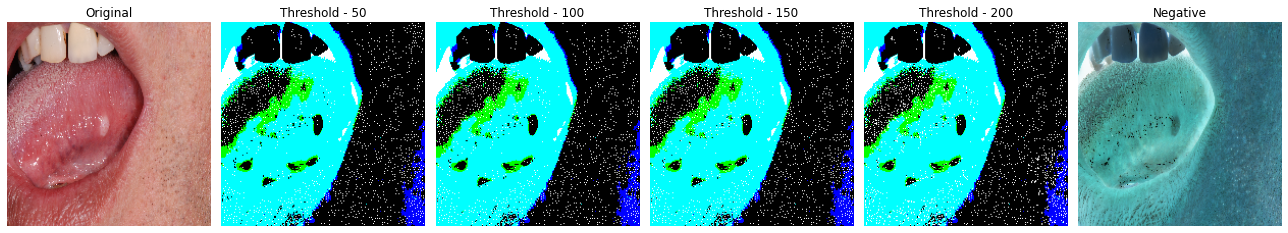

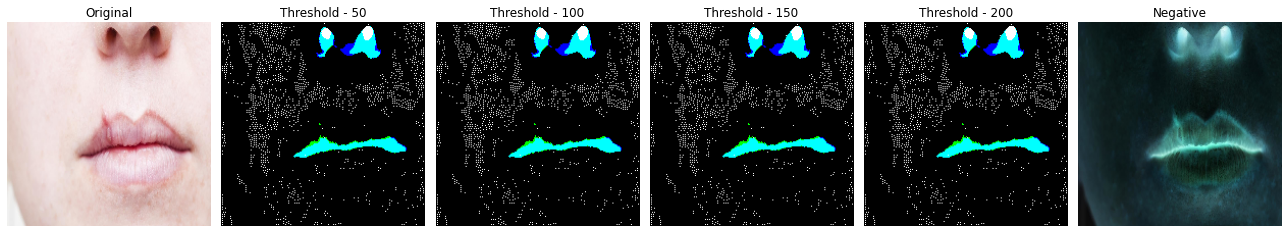

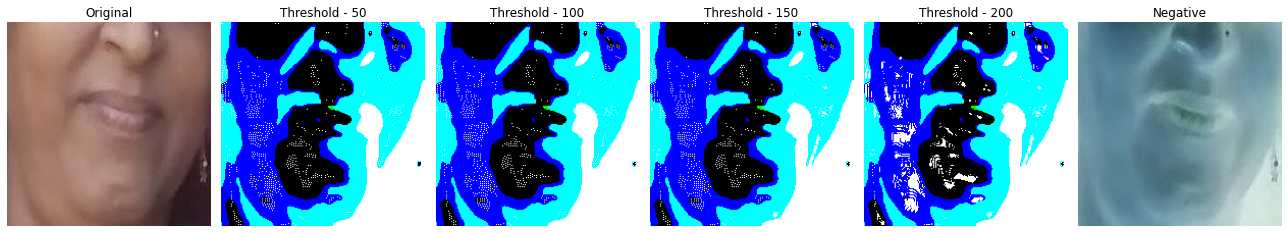

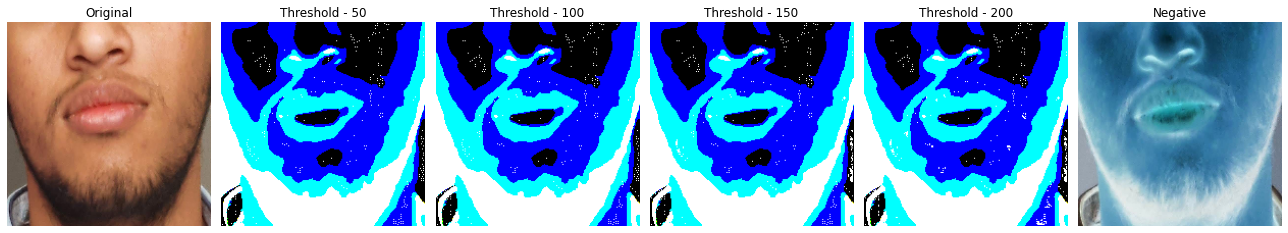

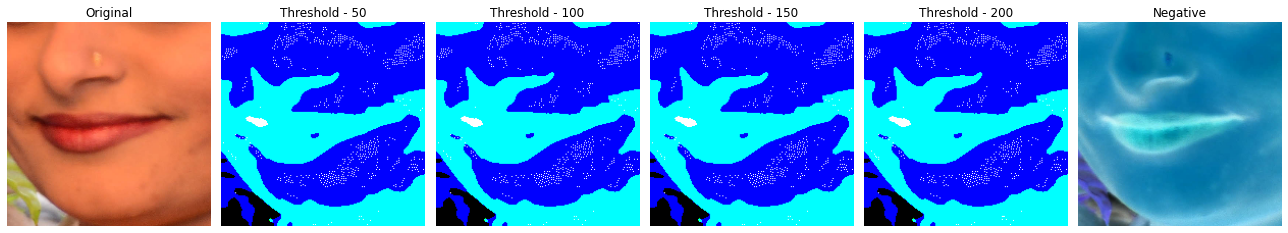

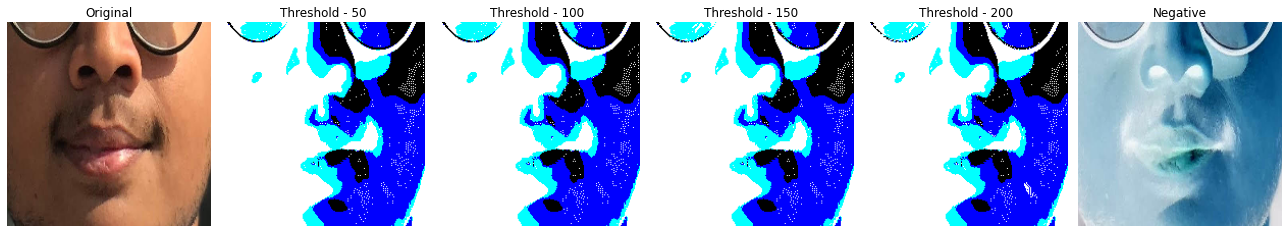

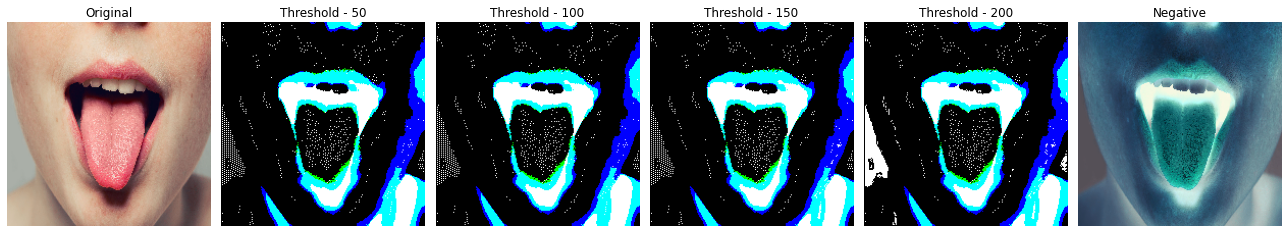

In [4]:
# Source Location for Oral Cancer Images
src = ['../input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/41457tn.jpg',
       '../input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/Lower_lip_cancer.jpg',
       '../input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/cancer 6.jpg',
       '../input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/dataset_figure1.jpg',
       '../input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/first-sign-lip-cancer_c3094f88d448d26b.jpg',
       '../input/oral-cancer-lips-and-tongue-images/OralCancer/non-cancer/20190916_1420142.jpg',
       '../input/oral-cancer-lips-and-tongue-images/OralCancer/non-cancer/20200314_1129242.jpg',
       '../input/oral-cancer-lips-and-tongue-images/OralCancer/non-cancer/DSC_01992.jpg',
       '../input/oral-cancer-lips-and-tongue-images/OralCancer/non-cancer/IMG_57592.jpg',
       '../input/oral-cancer-lips-and-tongue-images/OralCancer/non-cancer/tongue.jpg']

dest = 'OralCancer';
# Image preprocessing
os.makedirs(f"./{dest}")
for idx in range(10):
    img_path = f"./{dest}/{dest}_{str(idx+1)}.jpg"
    print_image(src[idx],img_path)

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img_path = '../input/brain-mri-images-for-brain-tumor-detection/yes/Y52.jpg'
img_original = cv2.imread(img_path)
img_original = cv2.resize(img_original, (50, 50), interpolation=cv2.INTER_CUBIC);
np.set_printoptions(threshold=np.inf)
# print(img_original)